<a href="https://colab.research.google.com/github/2813/dls-homework/blob/main/dls_home3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Загрузка данных

In [ ]:
#! conda install -y gdown
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 94.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.7MB/s]


In [ ]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.head() # смотрим на случайные строки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.info() # убедимся, что нет NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.isna().sum() # строим табличку сколько у нас NaN в каждом столбце

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

# Анализ данных

Смотрим гистограмму для численных признаков

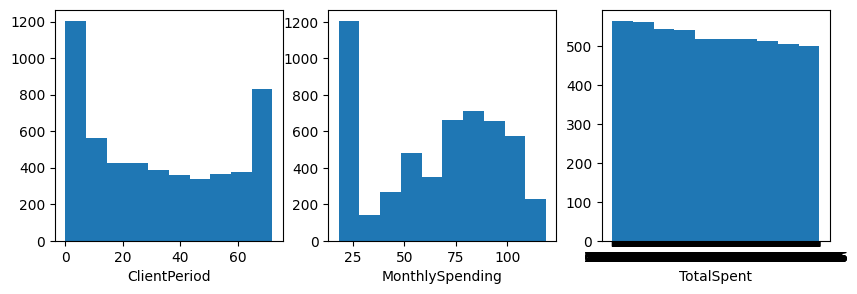

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs = axs.flatten()
for i,col in enumerate(num_cols):
    ax = axs[i]
    ax.hist(data[col])
    ax.set_xlabel(col)

plt.show()

In [ ]:
#Для категориальных признаков строим bar, используя вывод функции value_counts

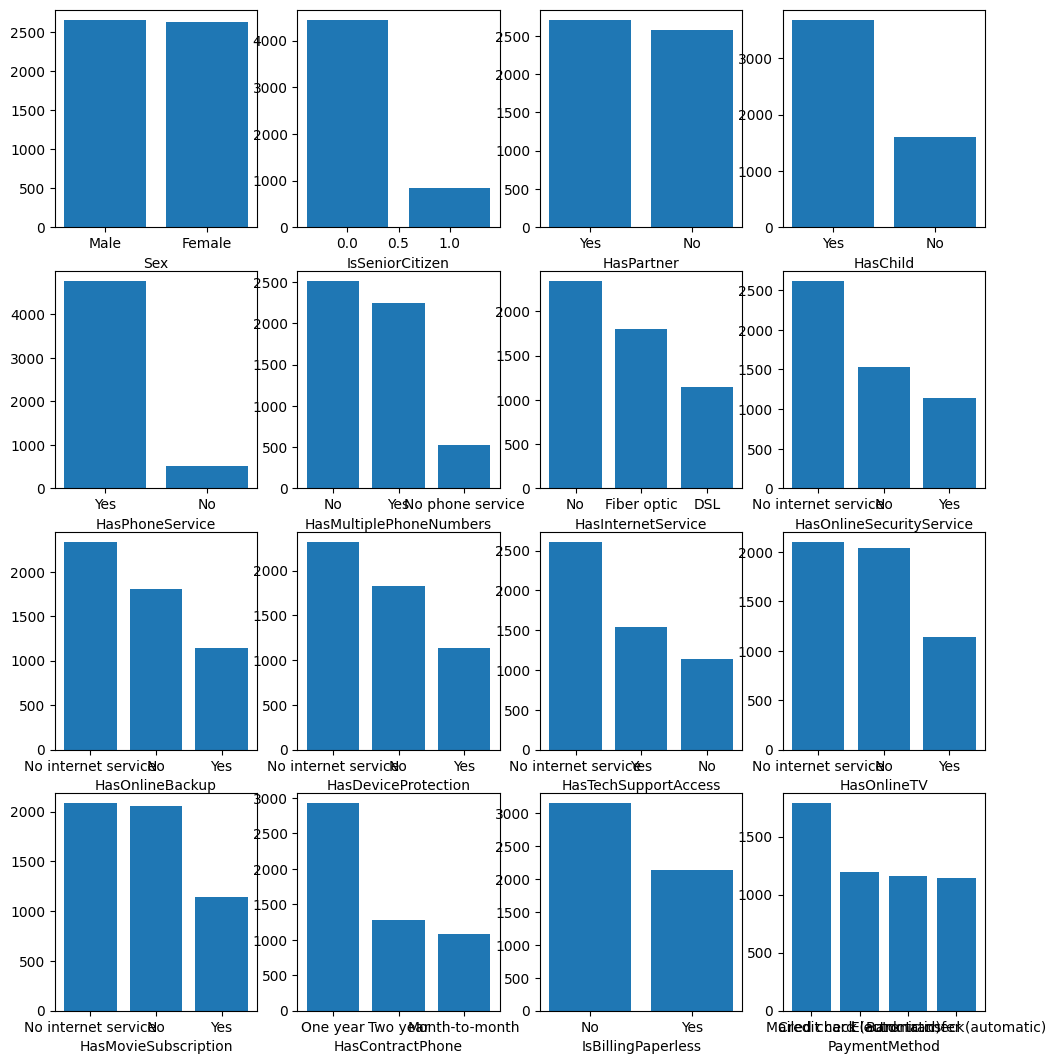

In [ ]:

x = data[cat_cols]

fig, axs = plt.subplots(4, 4, figsize=(12, 13))
axs = axs.flatten()
for i, col in enumerate(cat_cols):
    groups = pd.unique(x[col])
    counts = x[col].value_counts().to_frame()

    axs[i].bar(groups, counts[col])
    axs[i].set_xlabel(col)
plt.show()


In [ ]:
#Посмотрим на распределение целевой переменной

<Axes: >

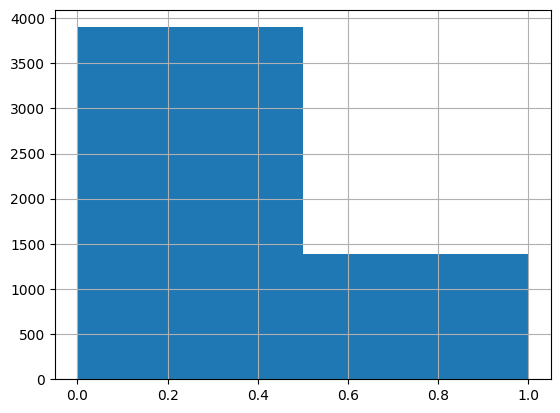

In [ ]:
data[target_col].hist(bins=2)

In [ ]:
class1,class0, total = len(data[data[target_col]==1]), len(data[data[target_col]==0]), len(data[target_col])
print(f'class1 = {class1}, class0 = {class0}, total = {total}, class0/class1 = {class0/class1}')

class1 = 1384, class0 = 3898, total = 5282, class0/class1 = 2.816473988439306


Видим, что одного класса больше чем другого в три раза. Будем считать, что распределение сбалансировано и с этим ничего не делаем

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression.
Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encodingа.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и
выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С.
(не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики,
 и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression
нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре.
Потом pipeline надо передать в GridSearchCV.
Для one-hot-encodinga можно испльзовать комбинацию LabelEncoder + OneHotEncoder
(сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score


In [ ]:
bin_var = [column for column in data[cat_cols].columns if data[column].nunique() == 2]
bin_var  #категориальные признаки, которые имеют всего два значения

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'IsBillingPaperless']

In [ ]:
df1 = data[bin_var].copy()
dt = test_data[bin_var].copy()
for d in [df1, dt]:  # для train и test меняем все yes-no на 1-0 (бинарные данные)
    for co in bin_var:
        d[co] = d[co].apply(lambda x: 1 if x=="Male" or x =="Yes" or x==1 else 0)
dt.head(5)

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless
0,1,0,1,0,1,0
1,1,1,1,0,1,1
2,1,0,0,0,1,1
3,0,0,1,1,1,0
4,0,0,1,1,1,0


In [ ]:
m_var = [column for column in data[cat_cols].columns if data[column].nunique() > 2]
m_var #категориальные признаки, которые имею больше двух значений

['HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'PaymentMethod']

In [ ]:
dummy_features = pd.get_dummies(data[m_var], drop_first=True, dtype=int)
dummy_features_test = pd.get_dummies(test_data[m_var], drop_first=True, dtype=int)
dummy_features.head(10)

,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,...,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0
5,0,0,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0
6,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,1,0,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
9,1,0,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,1,1,0,0


In [ ]:
#Пересобираем матрицу X, где будут числовые столбцы (num_cols), бывшие категориальные столбцы с двумя значениями (df1) и
# категориальные столбцы, в которых было больше двух значений (их мы конвертировали с помощью get_dummies)
X = pd.concat([data[num_cols], df1, dummy_features], axis=1)
X_test = pd.concat([test_data[num_cols], dt, dummy_features_test], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasMultiplePhoneNumbers_No phone service,...,HasTechSupportAccess_Yes,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
1,72,25.85,1872.2,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
2,1,75.90,75.9,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
3,32,79.30,2570,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60,115.25,6758.45,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,1,0,0


In [ ]:
#a1 = [x for x in a if x==' ']
#len(a1) # 9 пробелов

#Замечаем, что TotalSpent имеет тип object, а не числовой
# Конвертируем колонку TotalSpent в числовую.
# Все что не начинается с цифр (в том числе пробелы) конвертируем в ноль
X["TotalSpent"] = X["TotalSpent"].str.replace('[^0-9]', '0', regex=True).astype('float64')
X_test["TotalSpent"] = X_test["TotalSpent"].str.replace('[^0-9]', '0', regex=True).astype('float64')



In [ ]:
# Нормализуем числовые данные с помощью стандартного скеллера
scaler = StandardScaler()

X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
y = data[target_col]


In [ ]:
#ищем лучшие параметры для лог.модели
param_grid = {
    'C': [100, 10, 1, 0.1, 0.01, 0.001],
    'penalty': ['l2'],
}
search = GridSearchCV(estimator=LogisticRegression(random_state=0, max_iter=300),
                            param_grid=param_grid,
                            cv=5,
                            scoring='roc_auc',
                            n_jobs=2,
                            verbose=False)
search.fit(X,y)
# выведем наилучшие параметры
print(search.best_params_)
print(search.best_score_)
best_model = search  # пока сохраняем это как лучшую модель
#search.score(X,y)
#roc_auc_score(y, best_model.predict_proba(X_test)[:,1])

{'C': 100, 'penalty': 'l2'}
0.8436595355829877


## Применение градиентного бустинга (2 балла)
Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# Пробуем CatBoost
X_train, X_valid, y_train, y_valid = train_test_split(data.drop(columns='Churn'), data[target_col],
                                                      test_size=0.3, random_state=0)
cb = CatBoostClassifier()
cb.fit(X_train, y_train, eval_set=(X_valid, y_valid),cat_features=cat_cols, verbose=False)
roc_auc_score(y_valid, cb.predict_proba(X_valid)[:,1])

0.8387586971481

In [ ]:
#Пробуем разные параметры для СatBoost
# depth = [5,6,7]
# lerning_rate = [0.7, 0.1, 0.02, 0.015, 0.01, 0.005]
# iteration = 600, 800
cb = CatBoostClassifier(cat_features=cat_cols, depth=5, learning_rate = 0.015,
                        iterations=800, random_seed=42)
cb.fit(X_train,y_train, eval_set=(X_valid, y_valid), verbose=False)
roc_auc_score(y_valid, cb.predict_proba(X_valid)[:,1])

0.8397675238507871

In [ ]:
#Дерево решений

from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X,y)
pred = dt_model.predict_proba(X)
dt_model.score(X, y)

0.998485422188565

In [ ]:
roc_auc_score(y, dt_model.predict_proba(X)[:,1])

0.9999936049908505

In [ ]:
# Пробуем случайных лес

clf = RandomForestClassifier(n_estimators=10, random_state=42)

grid_search = GridSearchCV(clf, {"min_samples_leaf":[20]}, scoring="roc_auc", cv=5)
rf = grid_search.fit(X, y);


In [ ]:
roc_auc_score(y, rf.predict_proba(X)[:,1])

0.8717987881735705

In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./submission.csv', index=False)